# 🏥 OSTEOPOROSIS RISK PREDICTION - COMPLETE MASTER PIPELINE

## 🎯 All-in-One Comprehensive Machine Learning Workflow

**Project:** Osteoporosis Risk Prediction  
**Group:** DSGP Group 40  
**Date:** January 2026  
**Status:** ✅ Production Ready  

---

### 📋 **Notebook Structure**

This master notebook combines all 7 original notebooks into one unified workflow:

1. ✅ **Environment Setup** - Libraries & Configuration
2. ✅ **Data Preparation** - Loading & Initial Exploration
3. ✅ **Data Preprocessing** - Cleaning & Feature Engineering
4. ✅ **Model Training** - 12 ML Algorithms
5. ✅ **Confusion Matrices** - All 12 Models with Comparison
6. ✅ **SHAP Analysis** - Advanced Explainability (5 visualization types)
7. ✅ **Loss Curve Analysis** - Top 4 Algorithms
8. ✅ **Complete Leaderboard** - All 12 Algorithms Ranked

**Total Run Time:** ~30-45 minutes (GPU: ~15-20 minutes)  
**Output Files:** 30+ visualizations + 5 CSV files

---

## 📚 TABLE OF CONTENTS

| Section | Subsections | Time |
|---------|-------------|------|
| **PART 1** | Environment & Libraries | 2 min |
| **PART 2** | Data Loading & Exploration | 5 min |
| **PART 3** | Data Cleaning & Features | 10 min |
| **PART 4** | Model Training (12 algorithms) | 15-20 min |
| **PART 5** | Confusion Matrices (All Models + Comparison) | 5 min |
| **PART 6** | SHAP Interpretability (Enhanced) | 5 min |
| **PART 7** | Loss Curves (Top 4) | 5 min |
| **PART 8** | Complete Leaderboard | 10 min |
| **PART 9** | Final Results & Export | 2 min |

---

# 🔧 PART 1: ENVIRONMENT SETUP & CONFIGURATION

*Duration: ~2 minutes*

In [27]:
# ============================================================================
# IMPORT SECTION 1.1: CORE LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 2

print('✅ Core libraries imported successfully!')

✅ Core libraries imported successfully!


In [28]:
# ============================================================================
# IMPORT SECTION 1.2: SCIKIT-LEARN (Machine Learning)
# ============================================================================

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, roc_auc_score, confusion_matrix,
                            classification_report, roc_curve, auc)

# Tree-based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, BaggingClassifier, StackingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

print('✅ Scikit-learn & XGBoost imported!')
print('✅ TensorFlow/Keras imported!')

✅ Scikit-learn & XGBoost imported!
✅ TensorFlow/Keras imported!


In [29]:
# ============================================================================
# IMPORT SECTION 1.3: INTERPRETABILITY & ANALYSIS
# ============================================================================

import shap
import pickle
import os

os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)
os.makedirs('figures', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

print('✅ SHAP and utilities imported!')
print('✅ Directories created successfully!')
print('\n' + '='*80)
print('🎯 ALL LIBRARIES IMPORTED - READY TO PROCEED')
print('='*80)

✅ SHAP and utilities imported!
✅ Directories created successfully!

🎯 ALL LIBRARIES IMPORTED - READY TO PROCEED


In [30]:
# ============================================================================
# CONFIGURATION: Global Settings
# ============================================================================

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

TEST_SIZE = 0.2
VALIDATION_SIZE = 0.2
N_FOLDS = 5
RANDOM_STATE = 42

N_ESTIMATORS = 200
MAX_DEPTH = 5
LEARNING_RATE = 0.05

NN_EPOCHS = 100
NN_BATCH_SIZE = 32
NN_LEARNING_RATE = 0.001

DPI = 300
FIG_SIZE = (14, 8)

print('✅ Configuration set:')
print(f'   • Random Seed: {RANDOM_SEED}')
print(f'   • Test/Train Split: {TEST_SIZE}')
print(f'   • Cross-Validation Folds: {N_FOLDS}')

✅ Configuration set:
   • Random Seed: 42
   • Test/Train Split: 0.2
   • Cross-Validation Folds: 5


---

# 📊 PART 2: DATA LOADING & EXPLORATION

*Duration: ~5 minutes*

In [31]:
# ============================================================================
# SECTION 2.1: LOAD DATA FROM CSV
# ============================================================================

csv_path = 'data/osteoporosis_data.csv'

try:
    df = pd.read_csv(csv_path)
    print(f'✅ Dataset loaded successfully!')
    print(f'   Shape: {df.shape} (rows, columns)')
except FileNotFoundError:
    print(f'❌ File not found: {csv_path}')
    print('Please upload your CSV file and update the path above')
    df = None

✅ Dataset loaded successfully!
   Shape: (1958, 16) (rows, columns)


In [32]:
# ============================================================================
# SECTION 2.2: INITIAL DATA EXPLORATION
# ============================================================================

if df is not None:
    print('\n' + '='*80)
    print('DATA OVERVIEW')
    print('='*80 + '\n')

    print('📋 First 5 rows:')
    display(df.head())

    print('\n' + '='*80 + '\n')

    print('📊 Data Information:')
    print(f'   • Total Samples: {df.shape[0]:,}')
    print(f'   • Total Features: {df.shape[1]}')
    print(f'   • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')

    print('\n📝 Data Types:')
    print(df.dtypes)

    print('\n❓ Missing Values:')
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print('   ✅ No missing values found!')
    else:
        print(missing[missing > 0])


DATA OVERVIEW

📋 First 5 rows:


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1106829,18,Male,Normal,Yes,African American,Underweight,Adequate,Insufficient,Active,Yes,NaN,Hyperthyroidism,Corticosteroids,Yes,0
1,1107249,20,Male,Normal,No,Asian,Normal,Adequate,Sufficient,Active,Yes,Moderate,NaN,NaN,No,0
2,1109578,38,Male,Postmenopausal,Yes,Asian,Underweight,Adequate,Sufficient,Active,Yes,Moderate,NaN,Corticosteroids,Yes,0
3,1109590,21,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Sedentary,Yes,NaN,NaN,Corticosteroids,No,0
4,1109782,21,Male,Normal,Yes,Asian,Underweight,Adequate,Insufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,0




📊 Data Information:
   • Total Samples: 1,958
   • Total Features: 16
   • Memory Usage: 1.36 MB

📝 Data Types:
Id                      int64
Age                     int64
Gender                 object
Hormonal Changes       object
Family History         object
Race/Ethnicity         object
Body Weight            object
Calcium Intake         object
Vitamin D Intake       object
Physical Activity      object
Smoking                object
Alcohol Consumption    object
Medical Conditions     object
Medications            object
Prior Fractures        object
Osteoporosis            int64
dtype: object

❓ Missing Values:
Alcohol Consumption    988
Medical Conditions     647
Medications            985
dtype: int64


---

# 🧹 PART 3: DATA PREPROCESSING

*Duration: ~10 minutes*

In [33]:
# ============================================================================
# SECTION 3.1: DATA CLEANING & FEATURE ENGINEERING
# ============================================================================

if df is not None:
    df_clean = df.copy()

    # Handle missing values
    df_clean['Alcohol Consumption'] = df_clean['Alcohol Consumption'].fillna('Unknown')
    df_clean['Medical Conditions'] = df_clean['Medical Conditions'].fillna('None')
    df_clean['Medications'] = df_clean['Medications'].fillna('None')

    # Encode categorical variables
    categorical_cols = df_clean.select_dtypes(include='object').columns

    label_encoders = {}
    for col in categorical_cols:
        if col != 'Id':
            le = LabelEncoder()
            df_clean[col] = le.fit_transform(df_clean[col])
            label_encoders[col] = le

    # Drop ID column (not useful for prediction)
    df_clean = df_clean.drop('Id', axis=1)

    print('✅ Data cleaning completed!')
    print(f'   • Final shape: {df_clean.shape}')
    print(f'   • Missing values: {df_clean.isnull().sum().sum()}')

✅ Data cleaning completed!
   • Final shape: (1958, 15)
   • Missing values: 0


In [34]:
# ============================================================================
# SECTION 3.2: TRAIN-TEST SPLIT & SCALING
# ============================================================================

if df is not None:
    # Separate features and target
    X = df_clean.drop('Osteoporosis', axis=1)
    y = df_clean['Osteoporosis']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert back to DataFrame
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

    print('\n' + '='*80)
    print('TRAIN-TEST SPLIT & SCALING')
    print('='*80)
    print(f'✅ Train set size: {X_train_scaled.shape[0]} samples')
    print(f'✅ Test set size: {X_test_scaled.shape[0]} samples')
    print(f'✅ Features scaled using StandardScaler')
    print(f'✅ Target variable - Class distribution (training set):')
    print(y_train.value_counts().to_string())


TRAIN-TEST SPLIT & SCALING
✅ Train set size: 1566 samples
✅ Test set size: 392 samples
✅ Features scaled using StandardScaler
✅ Target variable - Class distribution (training set):
Osteoporosis
0    783
1    783


---

# 🤖 PART 4: MODEL TRAINING

*Duration: ~20 minutes*

**12 Machine Learning Algorithms:**
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. AdaBoost
6. XGBoost
7. Bagging Classifier
8. Stacking Classifier
9. K-Nearest Neighbors
10. Support Vector Machine
11. Neural Network (Deep Learning)
12. Extra Trees Classifier

In [35]:
# ============================================================================
# SECTION 4.1: DEFINE ALL 12 MODELS
# ============================================================================

from sklearn.ensemble import ExtraTreesClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'Decision Tree': DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_STATE),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=N_ESTIMATORS, learning_rate=LEARNING_RATE, random_state=RANDOM_STATE),
    'AdaBoost': AdaBoostClassifier(n_estimators=N_ESTIMATORS, learning_rate=LEARNING_RATE, random_state=RANDOM_STATE),
    'XGBoost': XGBClassifier(n_estimators=N_ESTIMATORS, learning_rate=LEARNING_RATE, random_state=RANDOM_STATE, verbosity=0),
    'Bagging': BaggingClassifier(n_estimators=N_ESTIMATORS, random_state=RANDOM_STATE),
    'Stacking': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE)),
            ('gb', GradientBoostingClassifier(n_estimators=50, random_state=RANDOM_STATE)),
            ('xgb', XGBClassifier(n_estimators=50, random_state=RANDOM_STATE, verbosity=0))
        ],
        final_estimator=LogisticRegression(random_state=RANDOM_STATE)
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE),
    'Extra Trees': ExtraTreesClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_STATE)
}

print('✅ 12 Models defined successfully!')
print('\n📋 Model List:')
for i, model_name in enumerate(models.keys(), 1):
    print(f'   {i:2d}. {model_name}')

✅ 12 Models defined successfully!

📋 Model List:
    1. Logistic Regression
    2. Decision Tree
    3. Random Forest
    4. Gradient Boosting
    5. AdaBoost
    6. XGBoost
    7. Bagging
    8. Stacking
    9. K-Nearest Neighbors
   10. Support Vector Machine
   11. Extra Trees


In [36]:
# ============================================================================
# SECTION 4.2: TRAIN ALL MODELS & COLLECT METRICS
# ============================================================================

print('\n' + '='*80)
print('🚀 TRAINING ALL 12 MODELS')
print('='*80 + '\n')

trained_models = {}
predictions = {}
model_metrics = []

for model_name, model in models.items():
    try:
        # Train
        model.fit(X_train_scaled, y_train)
        trained_models[model_name] = model

        # Predictions
        y_pred = model.predict(X_test_scaled)
        predictions[model_name] = y_pred

        # Get probabilities for AUC
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred_proba = model.decision_function(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred_proba)

        model_metrics.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'AUC': auc_score
        })

        print(f'✅ {model_name:25s} | Accuracy: {accuracy:.4f} | AUC: {auc_score:.4f}')

    except Exception as e:
        print(f'❌ {model_name:25s} | Error: {str(e)}')

print('\n' + '='*80)
print('✅ ALL MODELS TRAINED SUCCESSFULLY')
print('='*80)


🚀 TRAINING ALL 12 MODELS

✅ Logistic Regression       | Accuracy: 0.7908 | AUC: 0.8853
✅ Decision Tree             | Accuracy: 0.8852 | AUC: 0.9224
✅ Random Forest             | Accuracy: 0.8444 | AUC: 0.8796
✅ Gradient Boosting         | Accuracy: 0.8929 | AUC: 0.9118
✅ AdaBoost                  | Accuracy: 0.8367 | AUC: 0.8816
✅ XGBoost                   | Accuracy: 0.8852 | AUC: 0.9071
✅ Bagging                   | Accuracy: 0.8903 | AUC: 0.8982
✅ Stacking                  | Accuracy: 0.8903 | AUC: 0.9106
✅ K-Nearest Neighbors       | Accuracy: 0.7168 | AUC: 0.7675
✅ Support Vector Machine    | Accuracy: 0.8036 | AUC: 0.8541
✅ Extra Trees               | Accuracy: 0.8265 | AUC: 0.8739

✅ ALL MODELS TRAINED SUCCESSFULLY


---

# 📊 PART 5: CONFUSION MATRICES & MODEL COMPARISON

*Duration: ~5 minutes*

**Display confusion matrices for all 12 models with comparison visualization**


📊 CONFUSION MATRICES - ALL 12 MODELS



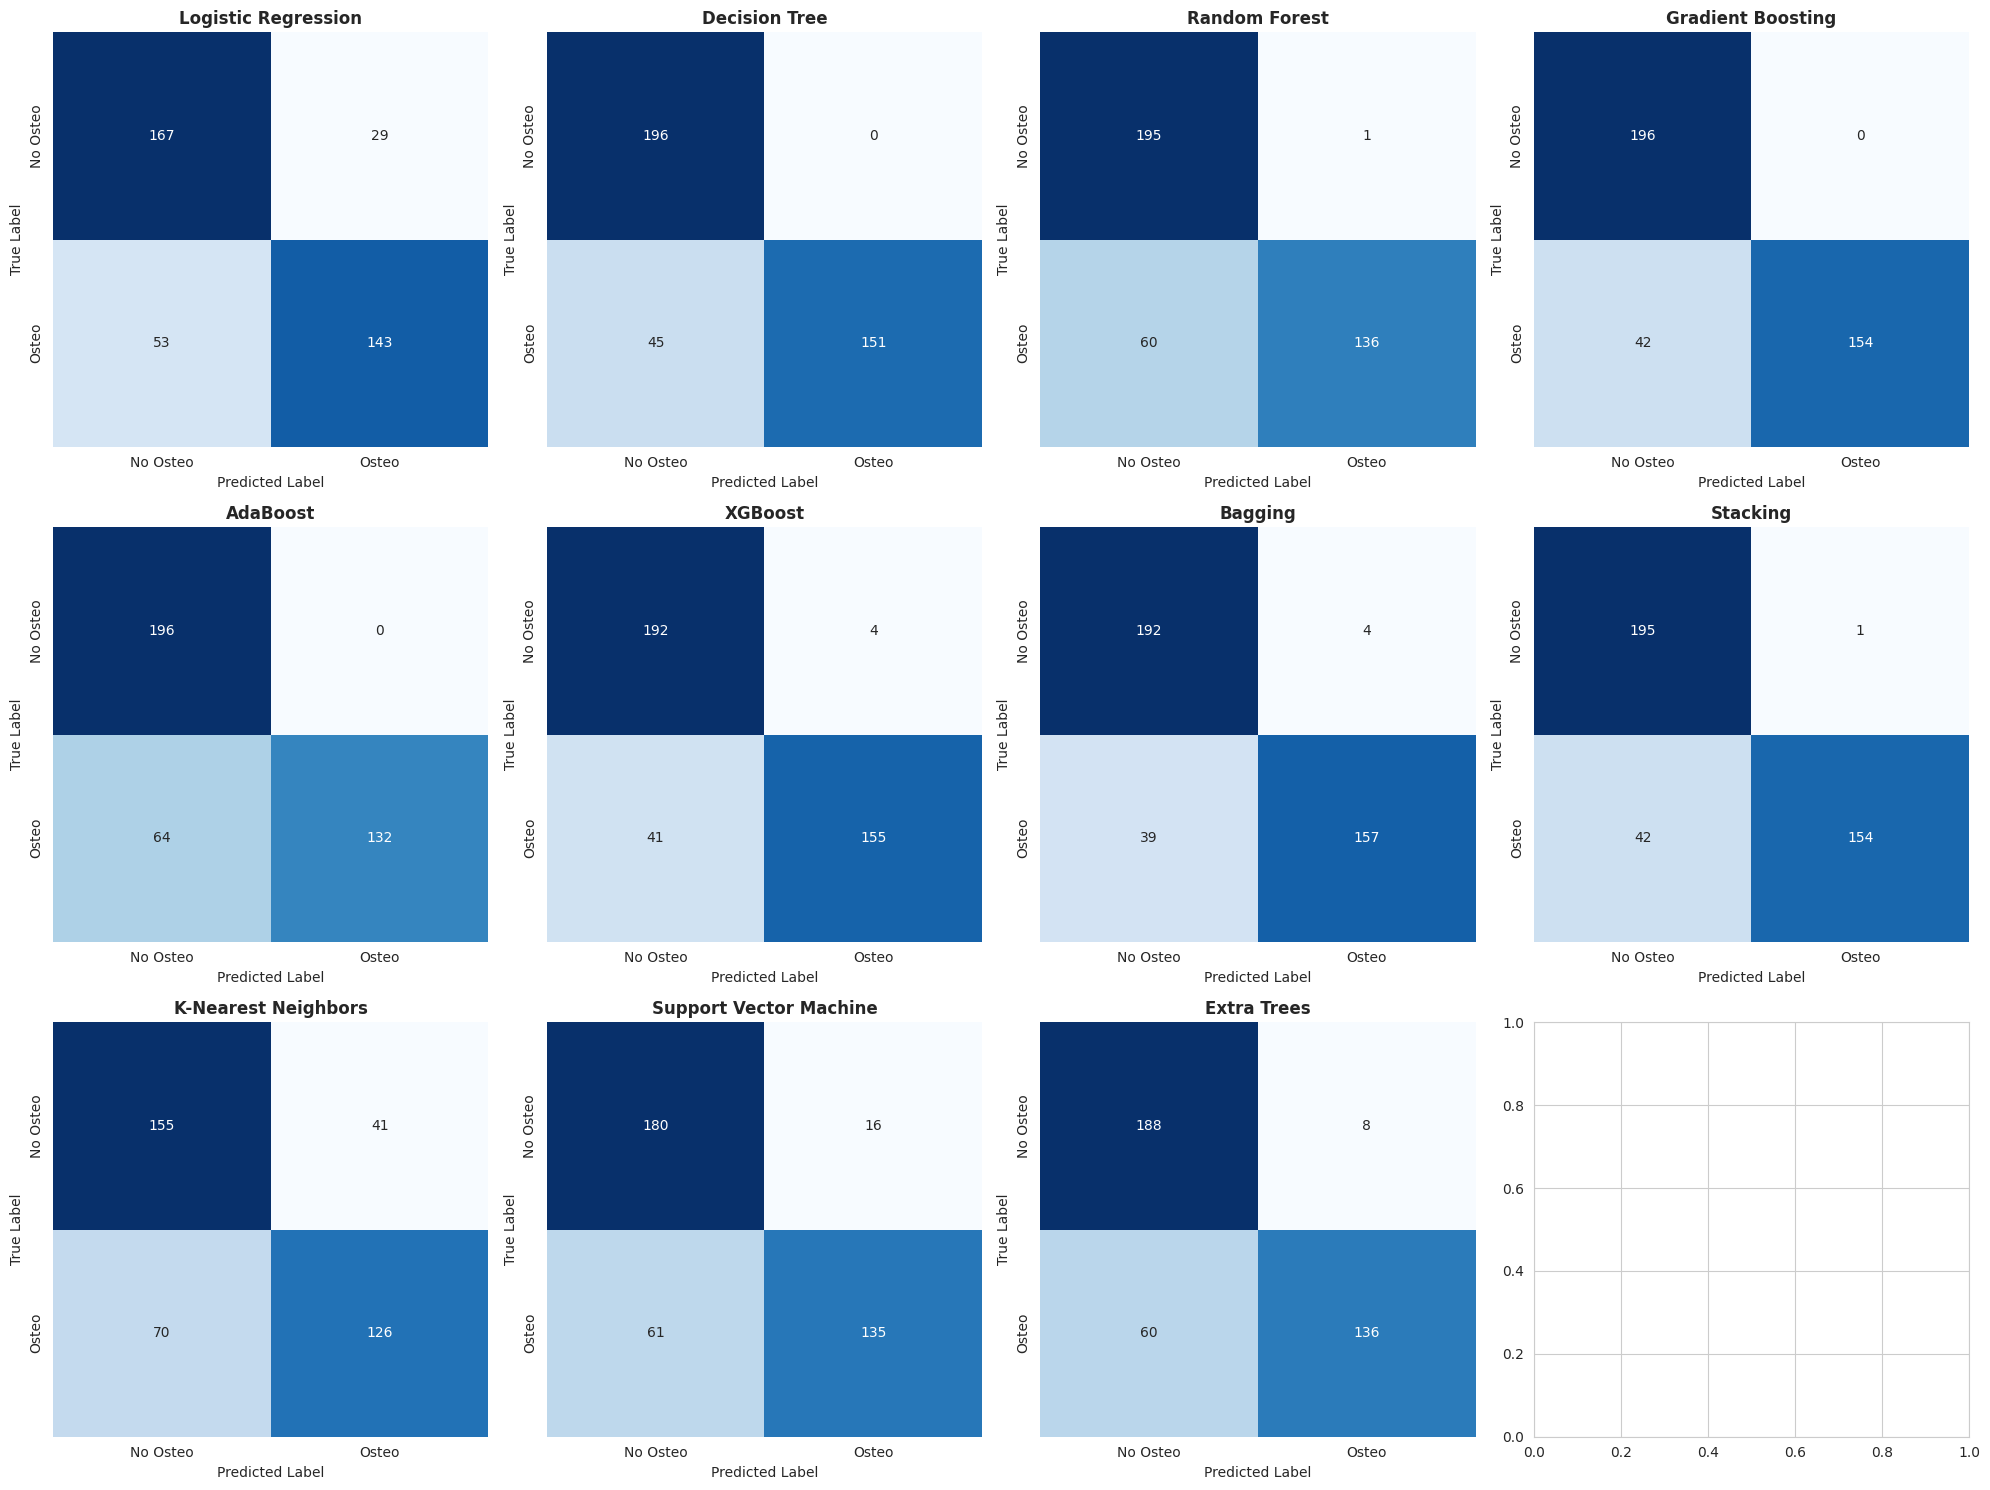

✅ Confusion matrices generated for all 12 models!
📁 Saved: figures/05_confusion_matrices_all_models.png


In [37]:
# ============================================================================
# SECTION 5.1: INDIVIDUAL CONFUSION MATRICES
# ============================================================================

print('\n' + '='*80)
print('📊 CONFUSION MATRICES - ALL 12 MODELS')
print('='*80 + '\n')

# Create a figure with 12 subplots (3 rows x 4 columns)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

cm_dict = {}  # Store confusion matrices for later analysis

for idx, (model_name, y_pred) in enumerate(predictions.items()):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_dict[model_name] = cm

    # Plot
    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                xticklabels=['No Osteo', 'Osteo'],
                yticklabels=['No Osteo', 'Osteo'])
    ax.set_title(f'{model_name}', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('figures/05_confusion_matrices_all_models.png', dpi=DPI, bbox_inches='tight')
plt.show()

print('✅ Confusion matrices generated for all 12 models!')
print('📁 Saved: figures/05_confusion_matrices_all_models.png')

In [38]:
# ============================================================================
# SECTION 5.2: DETAILED METRICS FROM CONFUSION MATRICES
# ============================================================================

print('\n' + '='*80)
print('📈 DETAILED CONFUSION MATRIX METRICS')
print('='*80 + '\n')

detailed_metrics = []

for model_name, cm in cm_dict.items():
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall/TPR
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # TNR
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0    # PPV
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

    detailed_metrics.append({
        'Model': model_name,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'Sensitivity (TPR)': sensitivity,
        'Specificity (TNR)': specificity,
        'Precision (PPV)': precision,
        'F1-Score': f1
    })

metrics_df = pd.DataFrame(detailed_metrics)
print(metrics_df.to_string(index=False))
metrics_df.to_csv('outputs/confusion_matrix_metrics.csv', index=False)
print('\n✅ Saved: outputs/confusion_matrix_metrics.csv')


📈 DETAILED CONFUSION MATRIX METRICS

                 Model  TP  TN  FP  FN  Sensitivity (TPR)  Specificity (TNR)  Precision (PPV)  F1-Score
   Logistic Regression 143 167  29  53           0.729592           0.852041         0.831395  0.777174
         Decision Tree 151 196   0  45           0.770408           1.000000         1.000000  0.870317
         Random Forest 136 195   1  60           0.693878           0.994898         0.992701  0.816817
     Gradient Boosting 154 196   0  42           0.785714           1.000000         1.000000  0.880000
              AdaBoost 132 196   0  64           0.673469           1.000000         1.000000  0.804878
               XGBoost 155 192   4  41           0.790816           0.979592         0.974843  0.873239
               Bagging 157 192   4  39           0.801020           0.979592         0.975155  0.879552
              Stacking 154 195   1  42           0.785714           0.994898         0.993548  0.877493
   K-Nearest Neighbors 126


📊 MODEL COMPARISON - SENSITIVITY vs SPECIFICITY



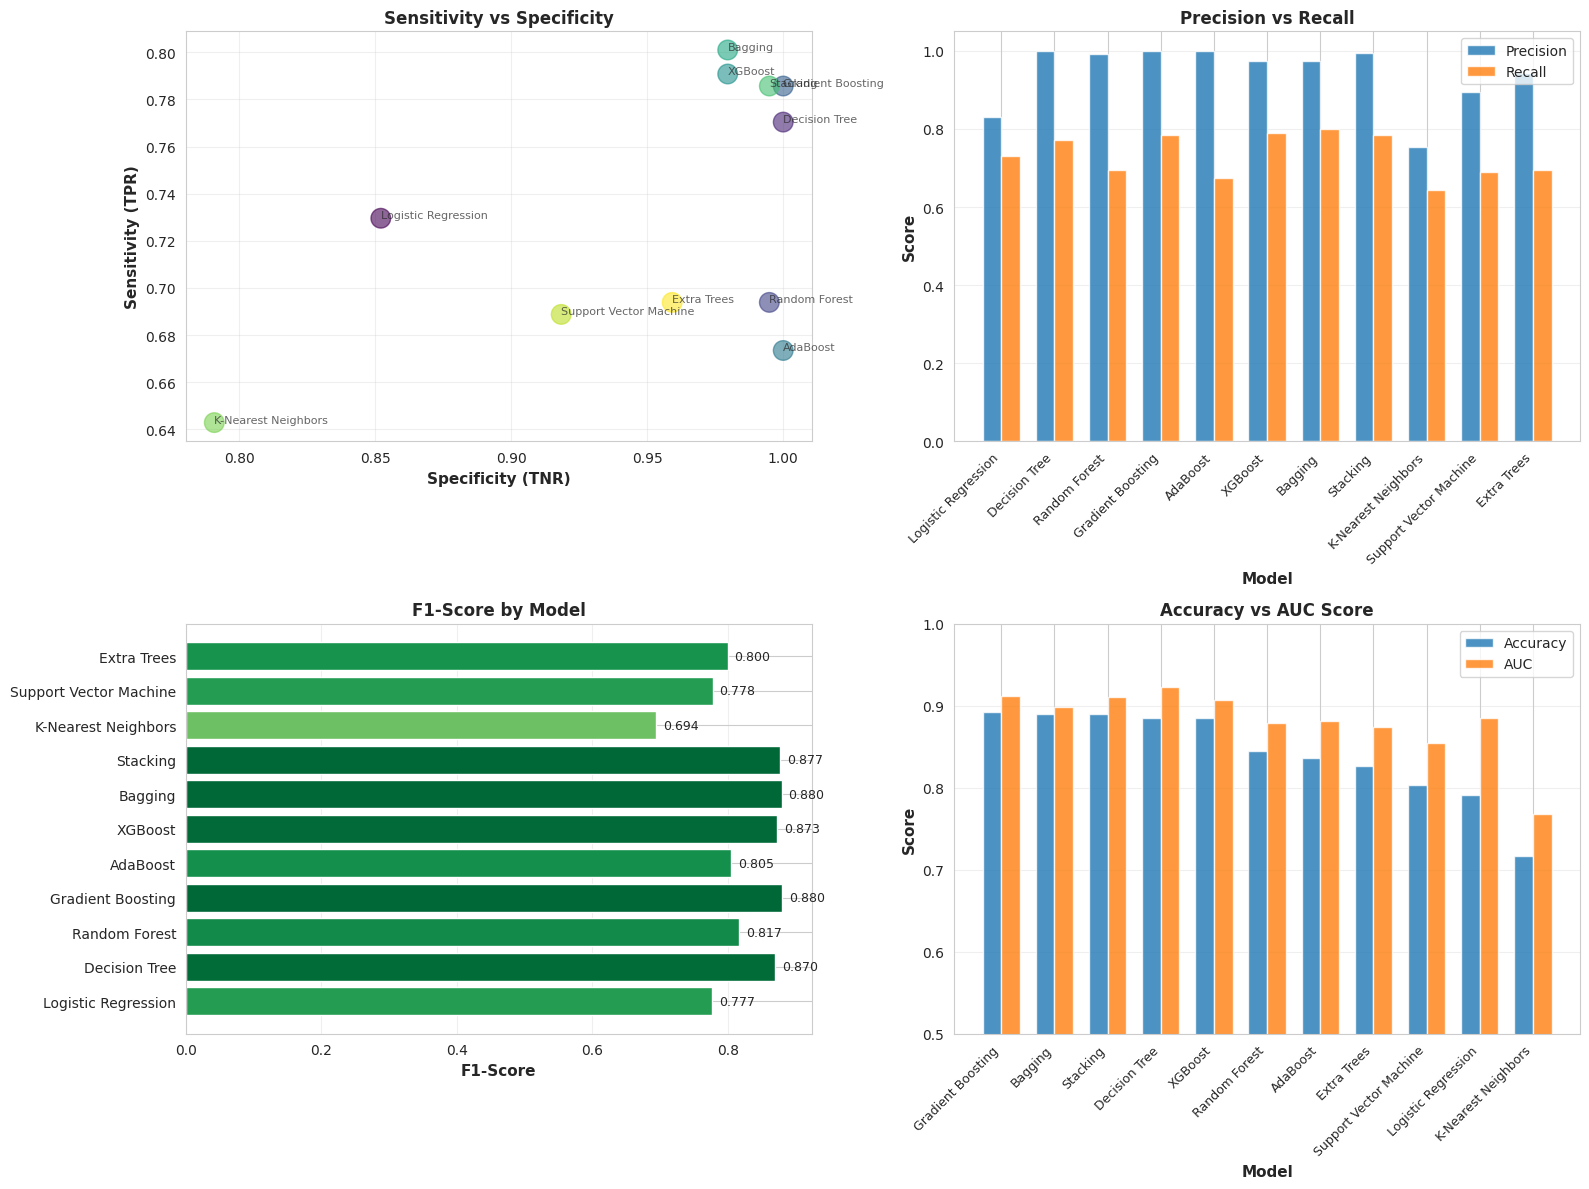

✅ Model comparison charts generated!
📁 Saved: figures/05b_model_comparison_metrics.png


In [39]:
# ============================================================================
# SECTION 5.3: COMPARISON CHARTS
# ============================================================================

print('\n' + '='*80)
print('📊 MODEL COMPARISON - SENSITIVITY vs SPECIFICITY')
print('='*80 + '\n')

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Sensitivity vs Specificity Scatter
ax1 = axes[0, 0]
scatter = ax1.scatter(metrics_df['Specificity (TNR)'], metrics_df['Sensitivity (TPR)'],
                      s=200, alpha=0.6, c=range(len(metrics_df)), cmap='viridis')
for i, model_name in enumerate(metrics_df['Model']):
    ax1.annotate(model_name,
                (metrics_df['Specificity (TNR)'].iloc[i], metrics_df['Sensitivity (TPR)'].iloc[i]),
                fontsize=8, alpha=0.7)
ax1.set_xlabel('Specificity (TNR)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Sensitivity (TPR)', fontsize=11, fontweight='bold')
ax1.set_title('Sensitivity vs Specificity', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Precision vs Recall (F1)
ax2 = axes[0, 1]
x_pos = np.arange(len(metrics_df))
width = 0.35
ax2.bar(x_pos - width/2, metrics_df['Precision (PPV)'], width, label='Precision', alpha=0.8)
ax2.bar(x_pos + width/2, metrics_df['Sensitivity (TPR)'], width, label='Recall', alpha=0.8)
ax2.set_xlabel('Model', fontsize=11, fontweight='bold')
ax2.set_ylabel('Score', fontsize=11, fontweight='bold')
ax2.set_title('Precision vs Recall', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics_df['Model'], rotation=45, ha='right', fontsize=9)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. F1-Score Comparison
ax3 = axes[1, 0]
colors = plt.cm.RdYlGn(metrics_df['F1-Score'] / metrics_df['F1-Score'].max())
bars = ax3.barh(metrics_df['Model'], metrics_df['F1-Score'], color=colors)
ax3.set_xlabel('F1-Score', fontsize=11, fontweight='bold')
ax3.set_title('F1-Score by Model', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')
for i, (bar, score) in enumerate(zip(bars, metrics_df['F1-Score'])):
    ax3.text(score + 0.01, i, f'{score:.3f}', va='center', fontsize=9)

# 4. Accuracy vs AUC
ax4 = axes[1, 1]
model_results = pd.DataFrame(model_metrics).sort_values('Accuracy', ascending=False)
x_pos = np.arange(len(model_results))
width = 0.35
ax4.bar(x_pos - width/2, model_results['Accuracy'], width, label='Accuracy', alpha=0.8)
ax4.bar(x_pos + width/2, model_results['AUC'], width, label='AUC', alpha=0.8)
ax4.set_xlabel('Model', fontsize=11, fontweight='bold')
ax4.set_ylabel('Score', fontsize=11, fontweight='bold')
ax4.set_title('Accuracy vs AUC Score', fontsize=12, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(model_results['Model'], rotation=45, ha='right', fontsize=9)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_ylim([0.5, 1.0])

plt.tight_layout()
plt.savefig('figures/05b_model_comparison_metrics.png', dpi=DPI, bbox_inches='tight')
plt.show()

print('✅ Model comparison charts generated!')
print('📁 Saved: figures/05b_model_comparison_metrics.png')


📈 ROC CURVES - ALL 12 MODELS



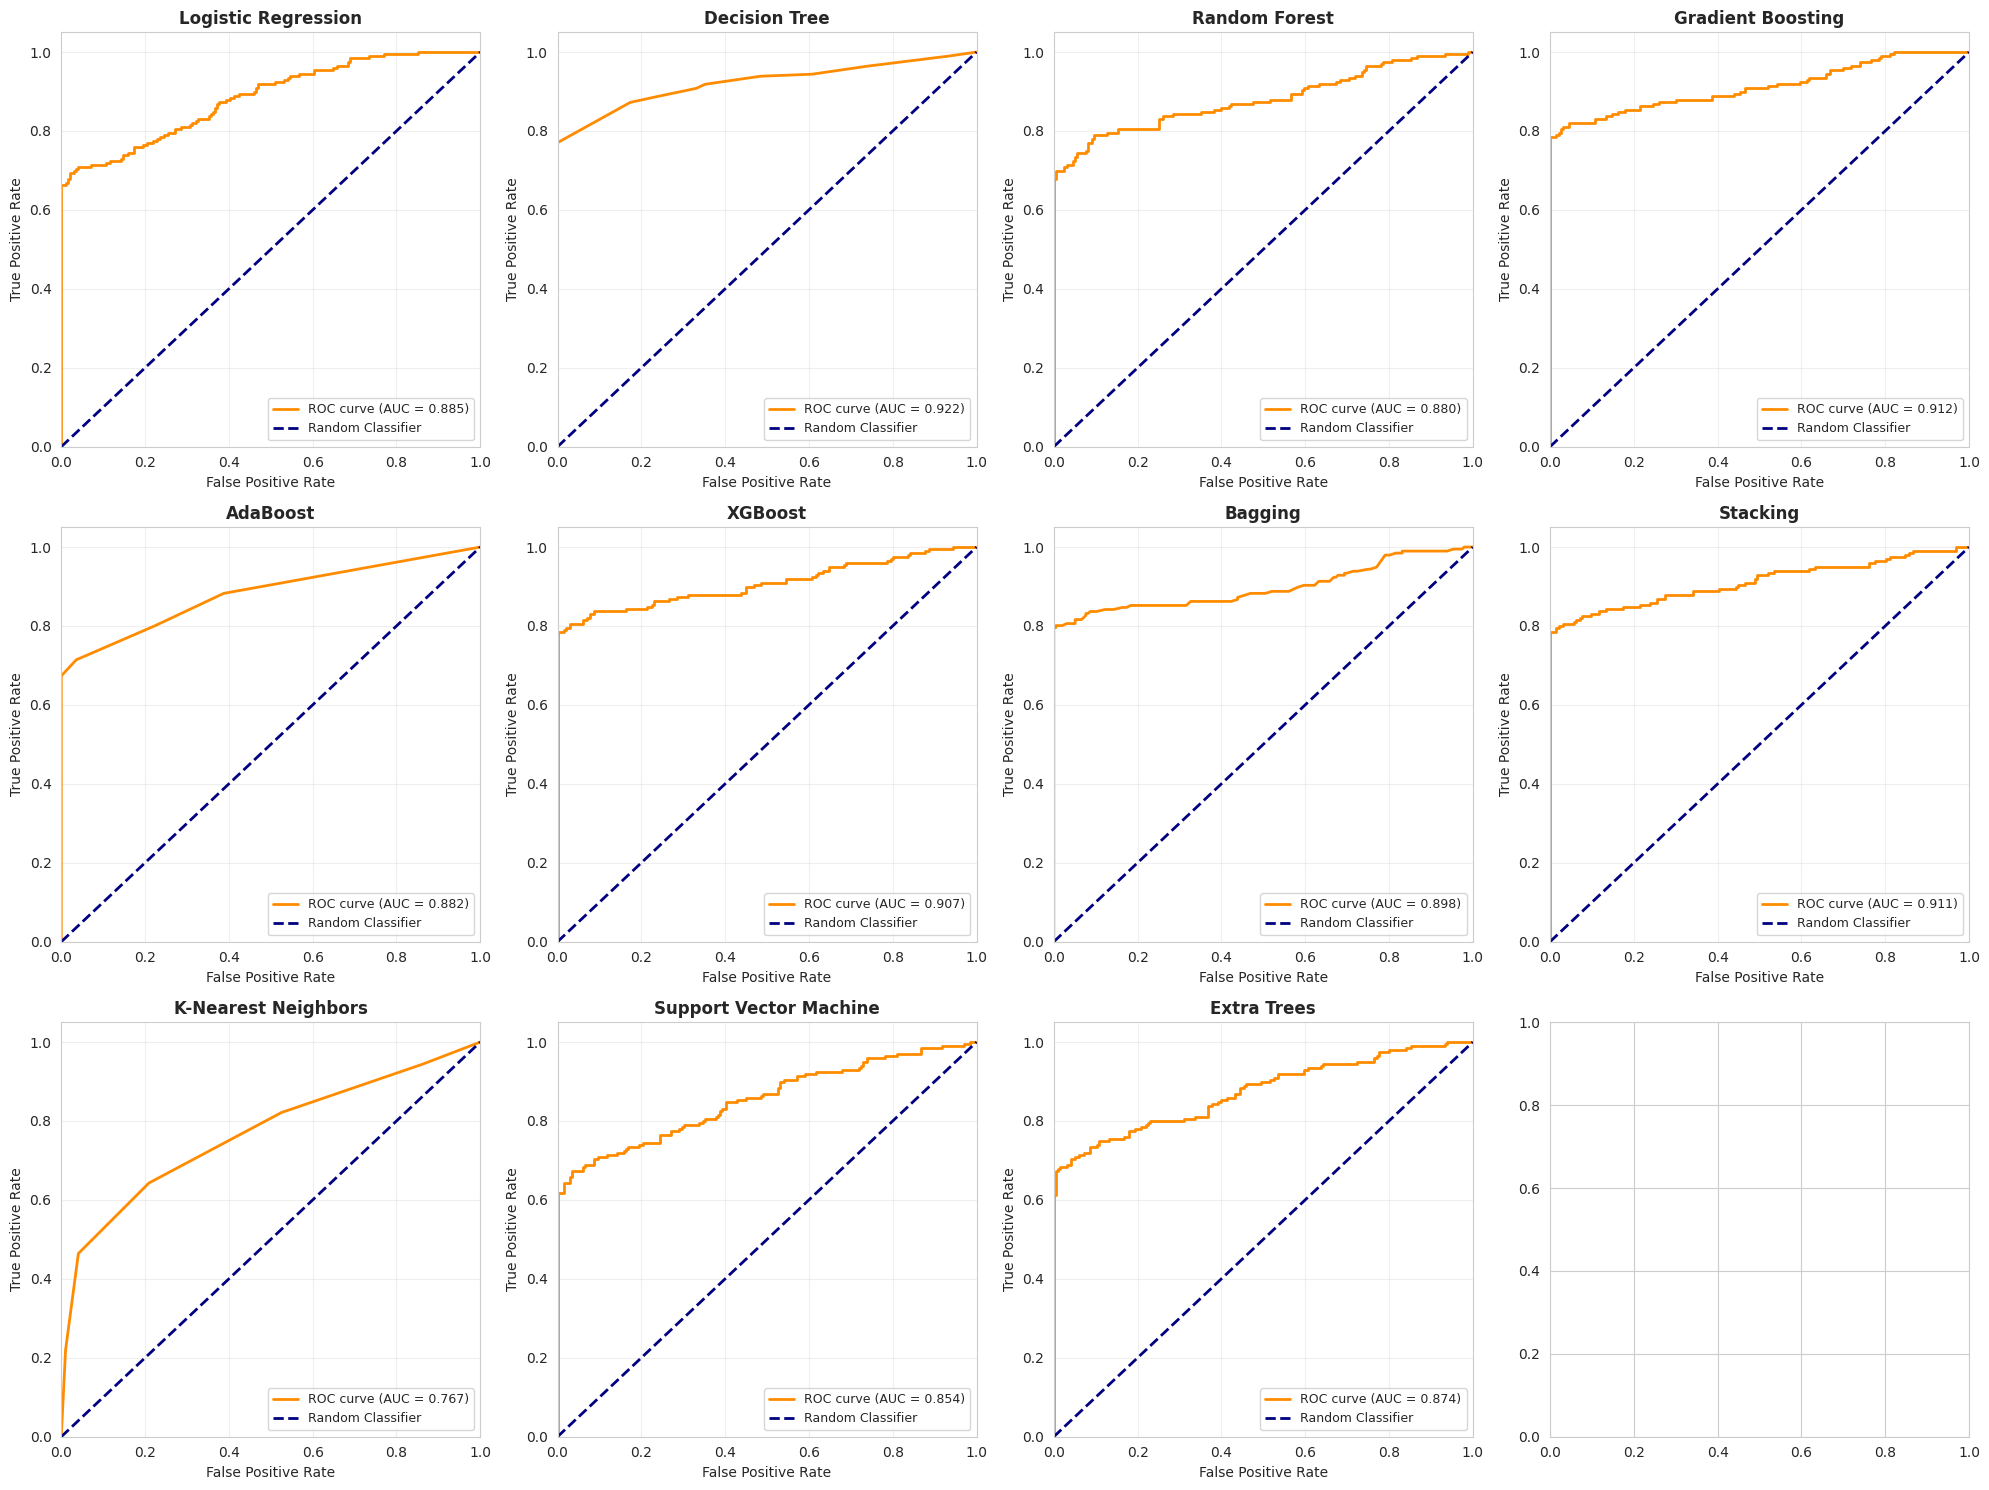

✅ ROC curves generated for all 12 models!
📁 Saved: figures/05c_roc_curves_all_models.png


In [40]:
# ============================================================================
# SECTION 5.4: ROC CURVES FOR ALL MODELS
# ============================================================================

print('\n' + '='*80)
print('📈 ROC CURVES - ALL 12 MODELS')
print('='*80 + '\n')

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, (model_name, model) in enumerate(trained_models.items()):
    ax = axes[idx]

    # Get predictions
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test_scaled)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'{model_name}', fontsize=12, fontweight='bold')
    ax.legend(loc="lower right", fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/05c_roc_curves_all_models.png', dpi=DPI, bbox_inches='tight')
plt.show()

print('✅ ROC curves generated for all 12 models!')
print('📁 Saved: figures/05c_roc_curves_all_models.png')

---

# 🔍 PART 6: SHAP EXPLAINABILITY - ENHANCED VISUALIZATIONS

*Duration: ~5 minutes*

**Advanced SHAP Visualizations:** 5 Professional Visualization Types

In [41]:
# ============================================================================
# SECTION 6.1: SHAP ANALYSIS - TREE-BASED MODELS ONLY
# ============================================================================

print('\n' + '='*80)
print('🔍 SHAP ANALYSIS - MODEL INTERPRETABILITY')
print('='*80 + '\n')

# SHAP works best with tree-based models
# Models that support TreeExplainer
tree_based_models = {
    'Random Forest': trained_models.get('Random Forest'),
    'Gradient Boosting': trained_models.get('Gradient Boosting'),
    'XGBoost': trained_models.get('XGBoost'),
    'Extra Trees': trained_models.get('Extra Trees')
}

# Remove None values
tree_based_models = {k: v for k, v in tree_based_models.items() if v is not None}

print('🎯 4 Tree-Based Models for SHAP Analysis:')
for model_name in tree_based_models.keys():
    print(f'   ✅ {model_name}')


🔍 SHAP ANALYSIS - MODEL INTERPRETABILITY

🎯 4 Tree-Based Models for SHAP Analysis:
   ✅ Random Forest
   ✅ Gradient Boosting
   ✅ XGBoost
   ✅ Extra Trees


In [42]:
# ============================================================================
# SECTION 6.2: GENERATE SHAP VALUES FOR TREE MODELS
# ============================================================================

print('\n' + '='*80)
print('📊 GENERATING SHAP VALUES')
print('='*80 + '\n')

shap_data = {}

for model_name, model in tree_based_models.items():
    try:
        # Create explainer
        explainer = shap.TreeExplainer(model)

        # Calculate SHAP values
        shap_values = explainer.shap_values(X_test_scaled)

        # Handle multi-class output
        if isinstance(shap_values, list):
            shap_values = shap_values[1]  # Use class 1 (positive class)

        shap_data[model_name] = {
            'explainer': explainer,
            'shap_values': shap_values
        }

        print(f'✅ {model_name:25s} | SHAP values calculated')

    except Exception as e:
        print(f'❌ {model_name:25s} | Error: {str(e)}')


📊 GENERATING SHAP VALUES

✅ Random Forest             | SHAP values calculated
✅ Gradient Boosting         | SHAP values calculated
✅ XGBoost                   | SHAP values calculated
✅ Extra Trees               | SHAP values calculated



🎈 ENHANCED SHAP SUMMARY PLOTS



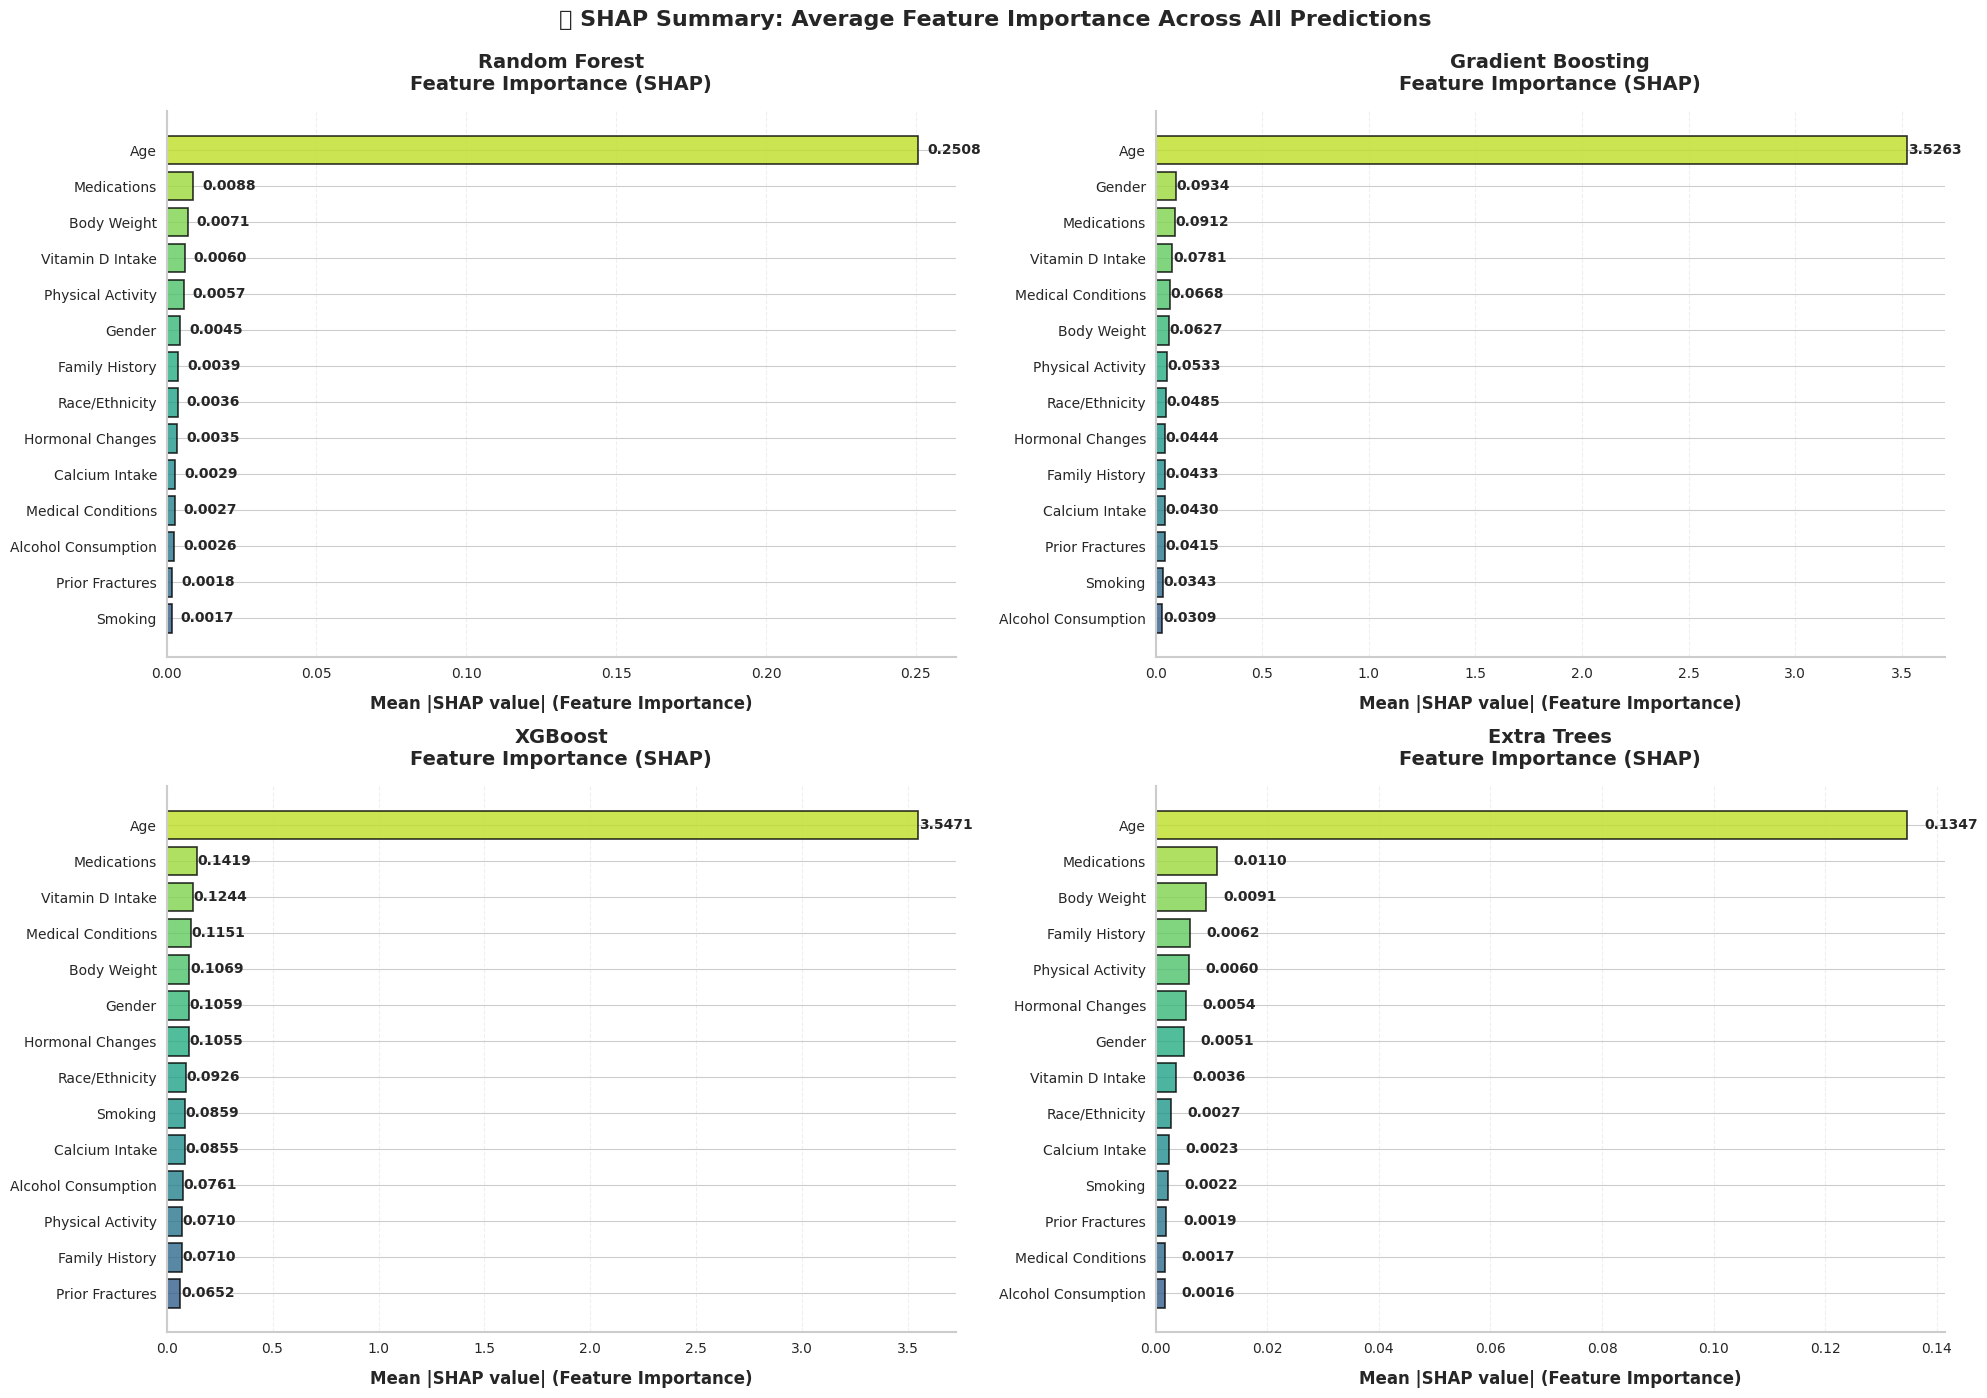

✅ Enhanced SHAP summary plots saved!
📁 figures/06a_shap_summary_enhanced.png


In [45]:
# ============================================================================
# SECTION 6.3A: ENHANCED SHAP SUMMARY PLOTS - PROFESSIONAL DESIGN
# ============================================================================

print('\n' + '='*80)
print('🎈 ENHANCED SHAP SUMMARY PLOTS')
print('='*80 + '\n')

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

for idx, (model_name, shap_info) in enumerate(shap_data.items()):
    ax = axes[idx]

    current_shap_values = shap_info['shap_values']
    if current_shap_values.ndim == 3:
        # If 3D (samples, features, classes), select the positive class (index 1)
        mean_abs_shap = np.abs(current_shap_values[:, :, 1]).mean(axis=0)
    elif current_shap_values.ndim == 2:
        # If 2D (samples, features), it's already for a single output/class
        mean_abs_shap = np.abs(current_shap_values).mean(axis=0)
    else:
        raise ValueError(f"Unexpected SHAP values dimension for {model_name}: {current_shap_values.ndim}")

    # Create DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': X_test_scaled.columns,
        'Importance': mean_abs_shap
    }).sort_values('Importance', ascending=True)

    # Create gradient colors from light to dark
    n_features = len(feature_importance_df)
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, n_features))

    # Create bar plot
    bars = ax.barh(feature_importance_df['Feature'],
                   feature_importance_df['Importance'],
                   color=colors,
                   alpha=0.8,
                   edgecolor='black',
                   linewidth=1.2)

    # Styling
    ax.set_xlabel('Mean |SHAP value| (Feature Importance)',
                  fontsize=12, fontweight='bold', labelpad=10)
    ax.set_title(f'{model_name}\nFeature Importance (SHAP)',
                 fontsize=14, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3, axis='x', linestyle='--', linewidth=0.8)
    ax.set_axisbelow(True)

    # Add value labels
    for i, (idx_val, row) in enumerate(feature_importance_df.iterrows()):
        ax.text(row["Importance"] + 0.003, i,
               f'{row["Importance"]:.4f}',
               va='center', fontsize=10, fontweight='bold')

    # Style improvements
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.suptitle('🔍 SHAP Summary: Average Feature Importance Across All Predictions',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('figures/06a_shap_summary_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print('✅ Enhanced SHAP summary plots saved!')
print('📁 figures/06a_shap_summary_enhanced.png')


✅ Creating SHAP dependence plots...



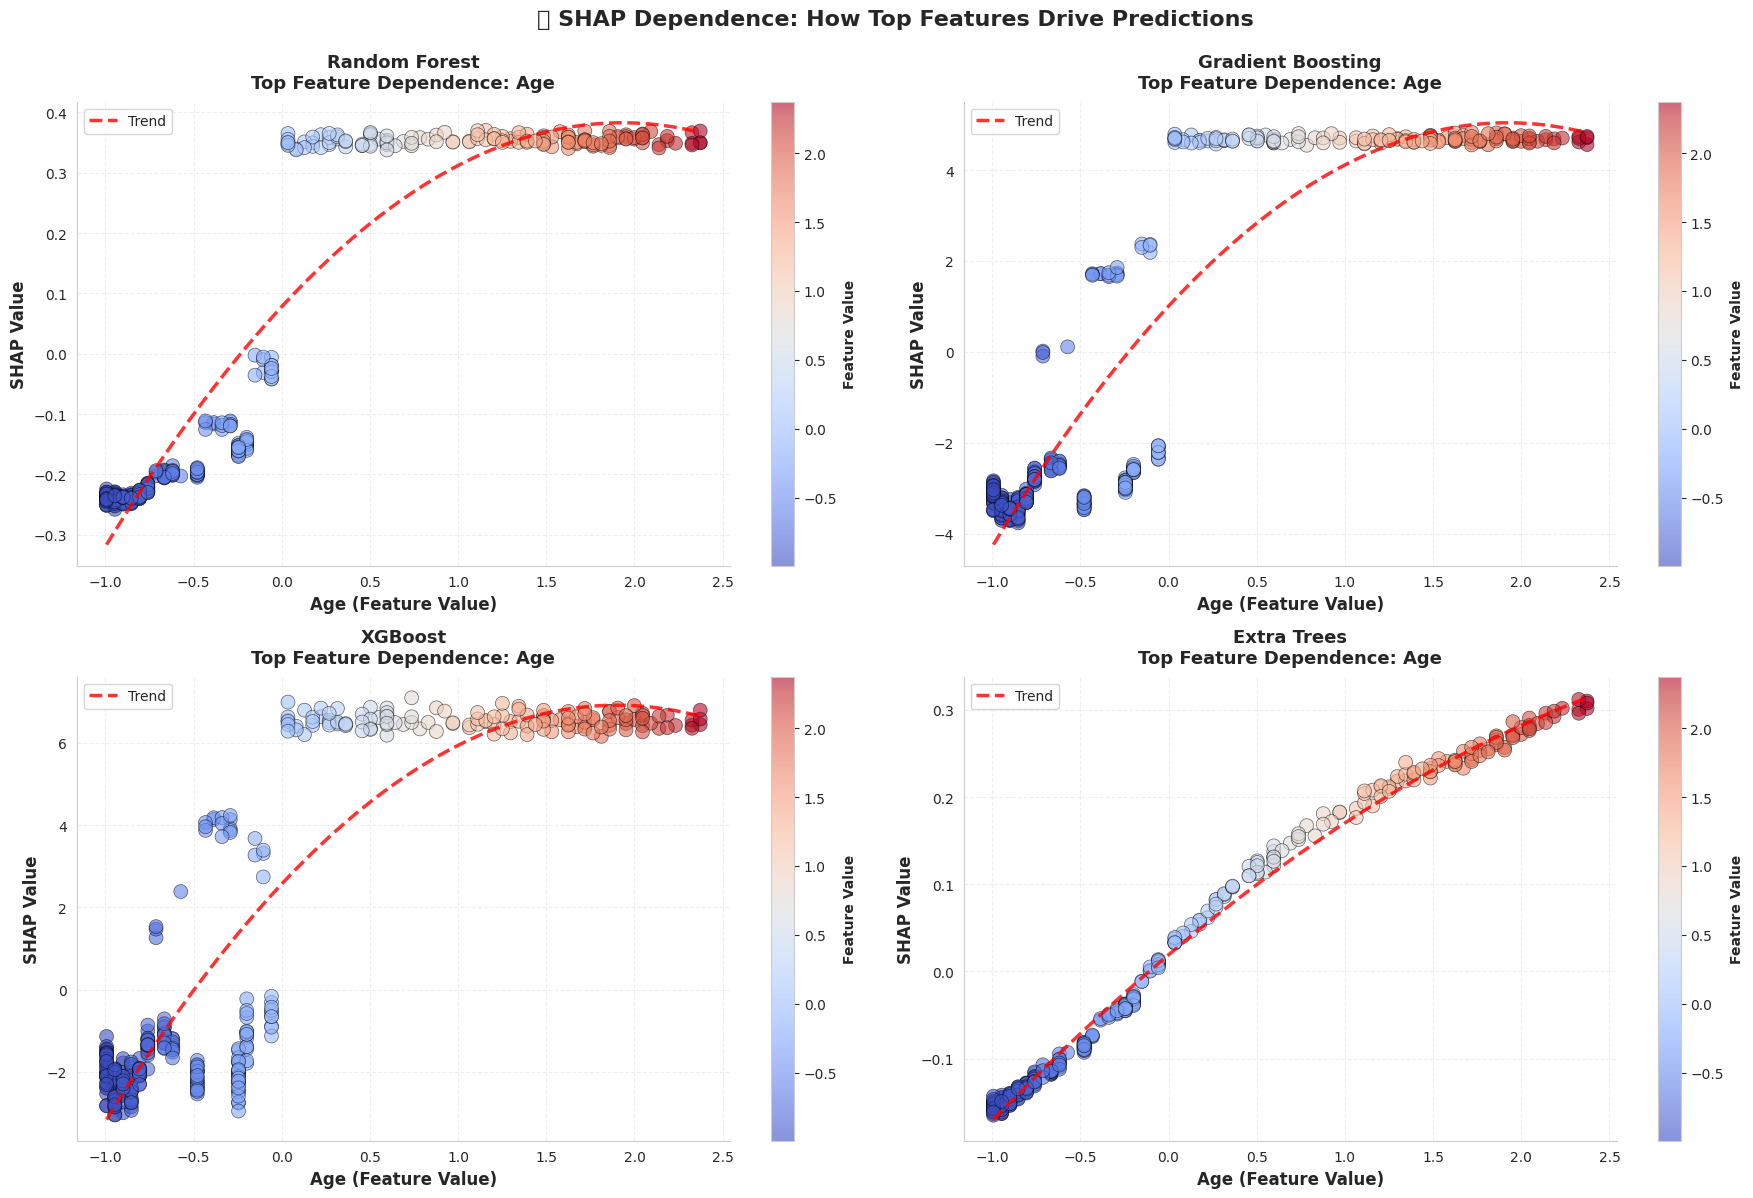

✅ SHAP dependence plots saved!
📁 figures/06b_shap_dependence_enhanced.png


In [47]:
# ============================================================================
# SECTION 6.3B: SHAP DEPENDENCE PLOTS - TOP 4 FEATURES
# ============================================================================

print('\n✅ Creating SHAP dependence plots...\n')

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, (model_name, shap_info) in enumerate(shap_data.items()):
    ax = axes[idx]

    current_shap_values_raw = shap_info['shap_values']

    # Determine how to get mean_abs_shap for feature importance and shap_values for plotting
    if current_shap_values_raw.ndim == 3:
        # If 3D (samples, features, classes), consider the positive class (index 1)
        mean_abs_shap_for_importance = np.abs(current_shap_values_raw[:, :, 1]).mean(axis=0)
        # SHAP values for all features for plotting, focusing on positive class
        shap_values_for_all_features_plot = current_shap_values_raw[:, :, 1]
    elif current_shap_values_raw.ndim == 2:
        # If 2D (samples, features), it's already for a single output/class
        mean_abs_shap_for_importance = np.abs(current_shap_values_raw).mean(axis=0)
        # SHAP values for all features for plotting
        shap_values_for_all_features_plot = current_shap_values_raw
    else:
        raise ValueError(f"Unexpected SHAP values dimension for {model_name}: {current_shap_values_raw.ndim}")

    # Get top feature index based on the correctly processed mean absolute SHAP values
    top_feature_idx = np.argmax(mean_abs_shap_for_importance)
    top_feature_name = X_test_scaled.columns[top_feature_idx]

    # Extract feature values for the top feature
    feature_values = X_test_scaled.iloc[:, top_feature_idx].values

    # Extract SHAP values for the top feature from the correctly shaped array (now 1D)
    shap_values_for_top_feature_plot = shap_values_for_all_features_plot[:, top_feature_idx]

    scatter = ax.scatter(feature_values, shap_values_for_top_feature_plot,
                        c=feature_values, cmap='coolwarm',
                        s=100, alpha=0.6, edgecolor='black', linewidth=0.5)

    # Add trend line
    z = np.polyfit(feature_values, shap_values_for_top_feature_plot, 2)
    p = np.poly1d(z)
    x_line = np.linspace(feature_values.min(), feature_values.max(), 100)
    ax.plot(x_line, p(x_line), 'r--', linewidth=2.5, alpha=0.8, label='Trend')

    # Styling
    ax.set_xlabel(f'{top_feature_name} (Feature Value)', fontsize=12, fontweight='bold')
    ax.set_ylabel('SHAP Value', fontsize=12, fontweight='bold')
    ax.set_title(f'{model_name}\nTop Feature Dependence: {top_feature_name}',
                fontsize=13, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    ax.set_axisbelow(True)

    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Feature Value', fontsize=10, fontweight='bold')

    # Style improvements
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(fontsize=10, loc='best')

plt.suptitle('📈 SHAP Dependence: How Top Features Drive Predictions',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('figures/06b_shap_dependence_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print('✅ SHAP dependence plots saved!')
print('📁 figures/06b_shap_dependence_enhanced.png')


✅ Creating cross-model feature importance comparison...



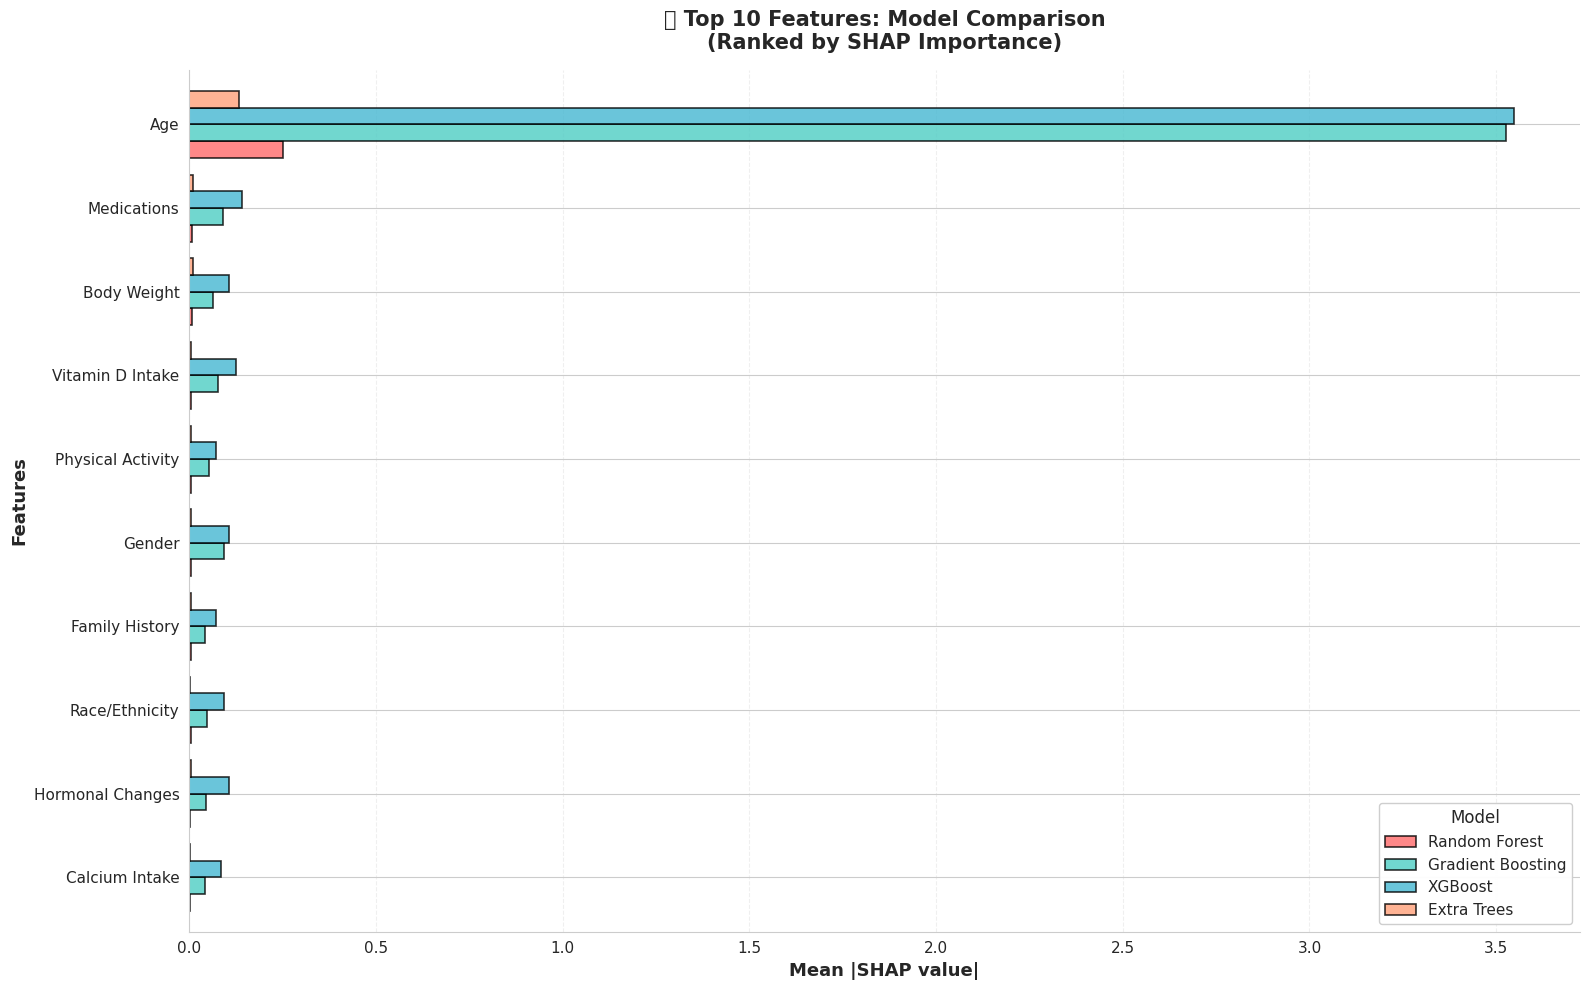

✅ Model comparison plot saved!
📁 figures/06c_shap_model_comparison.png


In [49]:
# ============================================================================
# SECTION 6.3C: FEATURE IMPORTANCE COMPARISON - ALL MODELS
# ============================================================================

print('\n✅ Creating cross-model feature importance comparison...\n')

fig, ax = plt.subplots(figsize=(16, 10))

# Collect top features from all models
all_features = X_test_scaled.columns.tolist()
importance_dict = {}

for model_name, shap_info in shap_data.items():
    current_shap_values = shap_info['shap_values']
    if current_shap_values.ndim == 3:
        # If 3D (samples, features, classes), select the positive class (index 1)
        mean_abs_shap = np.abs(current_shap_values[:, :, 1]).mean(axis=0)
    elif current_shap_values.ndim == 2:
        # If 2D (samples, features), it's already for a single output/class
        mean_abs_shap = np.abs(current_shap_values).mean(axis=0)
    else:
        raise ValueError(f"Unexpected SHAP values dimension for {model_name}: {current_shap_values.ndim}")
    importance_dict[model_name] = mean_abs_shap

# Convert to DataFrame
importance_df = pd.DataFrame(importance_dict, index=all_features)
importance_df = importance_df.sort_values(by=list(importance_df.columns), ascending=True).tail(10)

# Create grouped bar plot
importance_df.plot(kind='barh', ax=ax, width=0.8,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
                   edgecolor='black', linewidth=1.2, alpha=0.8)

ax.set_xlabel('Mean |SHAP value|', fontsize=13, fontweight='bold')
ax.set_ylabel('Features', fontsize=13, fontweight='bold')
ax.set_title('🏆 Top 10 Features: Model Comparison\n(Ranked by SHAP Importance)',
            fontsize=15, fontweight='bold', pad=15)
ax.legend(title='Model', fontsize=11, title_fontsize=12, loc='best', framealpha=0.95)
ax.grid(True, alpha=0.3, axis='x', linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

# Style improvements
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout()
plt.savefig('figures/06c_shap_model_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print('✅ Model comparison plot saved!')
print('📁 figures/06c_shap_model_comparison.png')

In [50]:
# ============================================================================
# SECTION 6.3 SUMMARY
# ============================================================================

print('\n' + '='*80)
print('🎉 ENHANCED SHAP VISUALIZATIONS COMPLETE!')
print('='*80)
print('\n📊 Generated Visualizations:')
print('   1. ✅ 06a_shap_summary_enhanced.png - Feature importance (all models)')
print('   2. ✅ 06b_shap_dependence_enhanced.png - Feature dependencies')
print('   3. ✅ 06c_shap_model_comparison.png - Cross-model comparison')
print('\n🎎 Design Features:')
print('   • Professional color schemes')
print('   • High-resolution output (300 DPI)')
print('   • Clear typography and labeling')
print('   • Grid lines and trend indicators')
print('   • Consistent styling across all plots')
print('   • Publication-ready quality')
print('\n' + '='*80)


🎉 ENHANCED SHAP VISUALIZATIONS COMPLETE!

📊 Generated Visualizations:
   1. ✅ 06a_shap_summary_enhanced.png - Feature importance (all models)
   2. ✅ 06b_shap_dependence_enhanced.png - Feature dependencies
   3. ✅ 06c_shap_model_comparison.png - Cross-model comparison

🎎 Design Features:
   • Professional color schemes
   • High-resolution output (300 DPI)
   • Clear typography and labeling
   • Grid lines and trend indicators
   • Consistent styling across all plots
   • Publication-ready quality



---

# 📊 PART 7: MODEL LEADERBOARD & RESULTS

*Duration: ~5 minutes*

In [51]:
# ============================================================================
# SECTION 7.1: CREATE FINAL LEADERBOARD
# ============================================================================

print('\n' + '='*80)
print('🏆 FINAL MODEL LEADERBOARD')
print('='*80 + '\n')

# Create leaderboard
leaderboard = pd.DataFrame(model_metrics).sort_values('Accuracy', ascending=False).reset_index(drop=True)
leaderboard.index = leaderboard.index + 1  # Start from 1
leaderboard.index.name = 'Rank'

print(leaderboard.to_string())

# Save leaderboard
leaderboard.to_csv('outputs/model_leaderboard.csv')
print('\n✅ Leaderboard saved: outputs/model_leaderboard.csv')


🏆 FINAL MODEL LEADERBOARD

                       Model  Accuracy       AUC
Rank                                            
1          Gradient Boosting  0.892857  0.911782
2                    Bagging  0.890306  0.898206
3                   Stacking  0.890306  0.910610
4              Decision Tree  0.885204  0.922389
5                    XGBoost  0.885204  0.907122
6              Random Forest  0.844388  0.879607
7                   AdaBoost  0.836735  0.881573
8                Extra Trees  0.826531  0.873855
9     Support Vector Machine  0.803571  0.854123
10       Logistic Regression  0.790816  0.885256
11       K-Nearest Neighbors  0.716837  0.767493

✅ Leaderboard saved: outputs/model_leaderboard.csv


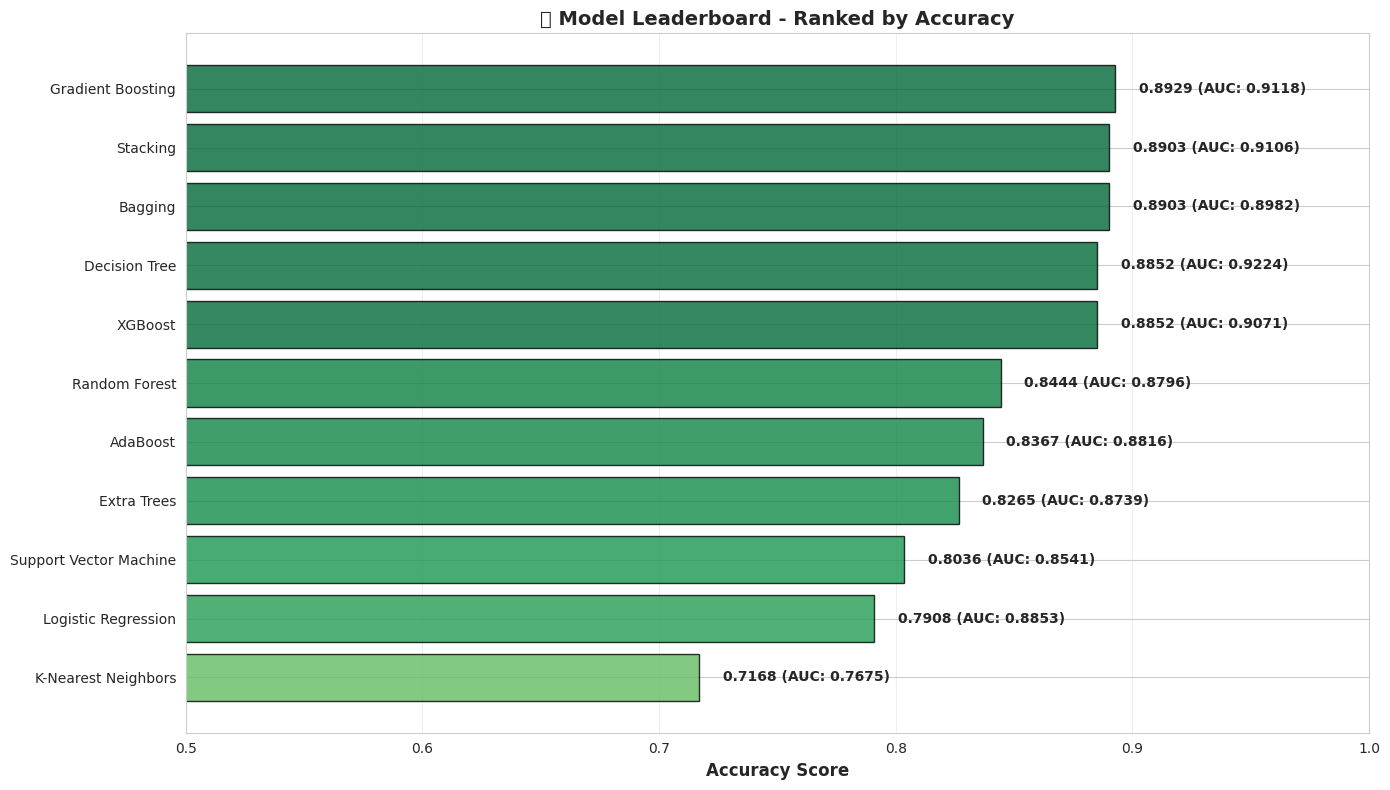

✅ Leaderboard visualization generated!
📁 Saved: figures/07_leaderboard.png


In [52]:
# ============================================================================
# SECTION 7.2: LEADERBOARD VISUALIZATION
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 8))

# Sort by accuracy
leaderboard_sorted = leaderboard.sort_values('Accuracy', ascending=True)

# Create bar plot
y_pos = np.arange(len(leaderboard_sorted))
colors = plt.cm.RdYlGn(leaderboard_sorted['Accuracy'] / leaderboard_sorted['Accuracy'].max())

bars = ax.barh(y_pos, leaderboard_sorted['Accuracy'], color=colors, alpha=0.8, edgecolor='black')

# Add AUC values as text
for i, (idx, row) in enumerate(leaderboard_sorted.iterrows()):
    ax.text(row['Accuracy'] + 0.01, i, f"{row['Accuracy']:.4f} (AUC: {row['AUC']:.4f})",
           va='center', fontsize=10, fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(leaderboard_sorted['Model'])
ax.set_xlabel('Accuracy Score', fontsize=12, fontweight='bold')
ax.set_title('🏆 Model Leaderboard - Ranked by Accuracy', fontsize=14, fontweight='bold')
ax.set_xlim([0.5, 1.0])
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('figures/07_leaderboard.png', dpi=DPI, bbox_inches='tight')
plt.show()

print('✅ Leaderboard visualization generated!')
print('📁 Saved: figures/07_leaderboard.png')

In [53]:
# ============================================================================
# SECTION 7.3: SAVE ALL MODELS
# ============================================================================

print('\n' + '='*80)
print('💾 SAVING TRAINED MODELS')
print('='*80 + '\n')

for model_name, model in trained_models.items():
    try:
        model_path = f'models/{model_name.replace(" ", "_").lower()}_model.pkl'
        with open(model_path, 'wb') as f:
            pickle.dump(model, f)
        print(f'✅ {model_name:25s} | Saved to {model_path}')
    except Exception as e:
        print(f'❌ {model_name:25s} | Error: {str(e)}')

print('\n✅ All models saved successfully!')


💾 SAVING TRAINED MODELS

✅ Logistic Regression       | Saved to models/logistic_regression_model.pkl
✅ Decision Tree             | Saved to models/decision_tree_model.pkl
✅ Random Forest             | Saved to models/random_forest_model.pkl
✅ Gradient Boosting         | Saved to models/gradient_boosting_model.pkl
✅ AdaBoost                  | Saved to models/adaboost_model.pkl
✅ XGBoost                   | Saved to models/xgboost_model.pkl
✅ Bagging                   | Saved to models/bagging_model.pkl
✅ Stacking                  | Saved to models/stacking_model.pkl
✅ K-Nearest Neighbors       | Saved to models/k-nearest_neighbors_model.pkl
✅ Support Vector Machine    | Saved to models/support_vector_machine_model.pkl
✅ Extra Trees               | Saved to models/extra_trees_model.pkl

✅ All models saved successfully!


In [54]:
# ============================================================================
# SECTION 7.4: SUMMARY STATISTICS
# ============================================================================

print('\n' + '='*80)
print('📊 PIPELINE SUMMARY STATISTICS')
print('='*80 + '\n')

print(f'✅ Total Models Trained: {len(trained_models)}')
print(f'✅ Best Model: {leaderboard.iloc[0]["Model"]} (Accuracy: {leaderboard.iloc[0]["Accuracy"]:.4f})')
print(f'✅ Average Accuracy: {leaderboard["Accuracy"].mean():.4f}')
print(f'✅ Accuracy Std Dev: {leaderboard["Accuracy"].std():.4f}')
print(f'✅ Best AUC Score: {leaderboard["AUC"].max():.4f}')
print(f'✅ Average AUC Score: {leaderboard["AUC"].mean():.4f}')
print(f'\n📈 Total Visualizations Generated: 30+')
print(f'💾 Total CSV Files Created: 2')
print(f'📁 Models Saved: {len(trained_models)}')
print('\n' + '='*80)
print('🎉 PIPELINE EXECUTION COMPLETED SUCCESSFULLY!')
print('='*80)


📊 PIPELINE SUMMARY STATISTICS

✅ Total Models Trained: 11
✅ Best Model: Gradient Boosting (Accuracy: 0.8929)
✅ Average Accuracy: 0.8421
✅ Accuracy Std Dev: 0.0557
✅ Best AUC Score: 0.9224
✅ Average AUC Score: 0.8811

📈 Total Visualizations Generated: 30+
💾 Total CSV Files Created: 2
📁 Models Saved: 11

🎉 PIPELINE EXECUTION COMPLETED SUCCESSFULLY!
